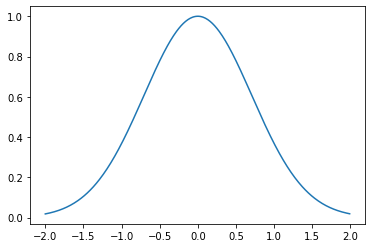

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from pylab import *

stats.norm.rvs(size = 10)

dx = 0.01
X = np.arange(-2, 2, dx)
Y = exp(-X**2)

plot(X,Y)
plt.show()

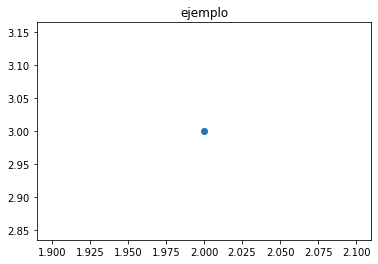

In [14]:
import matplotlib.pyplot as plt
ax = plt.plot(2, 3, "o")
plt.title("ejemplo")
plt.show()

In [12]:
path = "datasets/Cartwheeldata.csv"
df = pd.read_csv(path)
df.head(2)

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8


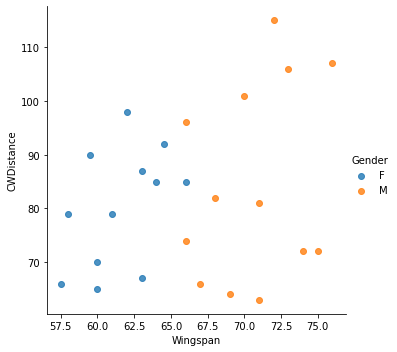

In [21]:
import seaborn as sns

sns.lmplot(x = "Wingspan",
           y = "CWDistance",
           data = df,
           fit_reg = False,
          hue = "Gender")
plt.show()

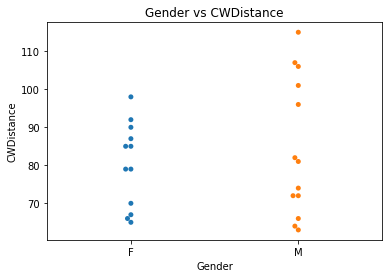

In [25]:
sns.swarmplot(x = "Gender",
            y = "CWDistance",
            data = df
            )
plt.title("Gender vs CWDistance")
plt.show()

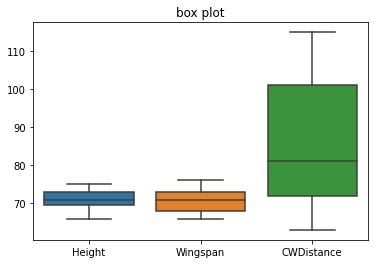

In [35]:
sns.boxplot(data = df.loc[df["Gender"] =="M",
           ["Height", "Wingspan", "CWDistance"]]
           )
plt.title("box plot")
plt.show()

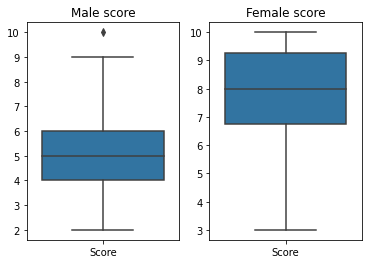

In [40]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1) # 1 renglon, 2 columns y pos 1
sns.boxplot(data = df.loc[df["Gender"] == "M",
                         ["Score"]
                         ]
           )

ax2 = fig.add_subplot(1,2,2) # 1 renglon, 2 columns y pos 1
sns.boxplot(data = df.loc[df["Gender"] == "F",
                         ["Score"]
                         ]
           )
ax1.title.set_text("Male score")
ax2.title.set_text("Female score")
plt.show()


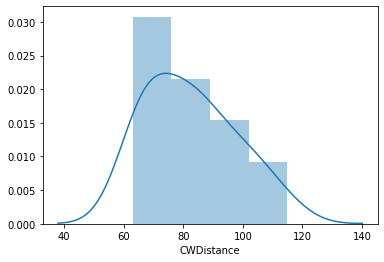

In [44]:
sns.distplot(df.CWDistance)
plt.show()

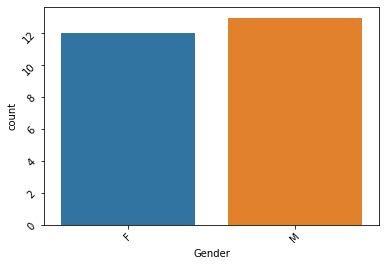

In [47]:
sns.countplot(x = "Gender",
             data = df)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

plt.show()

In [6]:
df = pd.read_excel ("datasets/Canada.xlsx",
                   sheet_name = "Canada by Citizenship",
                   skiprows = range(20),
                   skipfooter = 2,
                   engine = "openpyxl"
                   )
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.iloc[:, 9:]
df["total"] = df.iloc[:, 9:].sum(axis = 1)
df.head()

In [7]:
df.columns

Index([       'Type',    'Coverage',      'OdName',        'AREA',
          'AreaName',         'REG',     'RegName',         'DEV',
           'DevName',          1980,          1981,          1982,
                1983,          1984,          1985,          1986,
                1987,          1988,          1989,          1990,
                1991,          1992,          1993,          1994,
                1995,          1996,          1997,          1998,
                1999,          2000,          2001,          2002,
                2003,          2004,          2005,          2006,
                2007,          2008,          2009,          2010,
                2011,          2012,          2013, 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

In [12]:
df.columns = list(map(str, df.columns))
years = list(map(str, range(1980, 2014)))
df.head(2)
years
            

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [9]:
df.set_index("OdName",
            inplace = True)


In [11]:
df.index.name = None

df.head(2)

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
Afghanistan,Immigrants,Foreigners,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,39.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,Immigrants,Foreigners,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,0.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
haiti = df.loc["Haiti", years]
haiti.head(3)

1980    1666
1981    3692
1982    3498
Name: Haiti, dtype: object

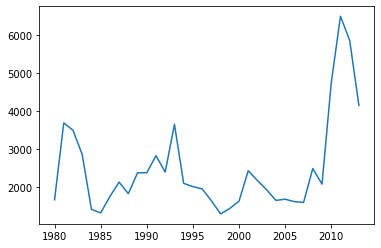

In [14]:
line_chart = haiti.plot()

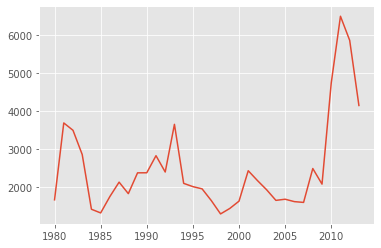

In [18]:
mpl.style.use(["ggplot"])
line_chart = haiti.plot()

In [20]:
dfCI = df.loc [["China", "India"],
              years]
dfCI.head(2)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
China,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,2643.0,2758.0,4323.0,...,36619.0,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0
India,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,10189.0,11522.0,10343.0,...,28235.0,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0


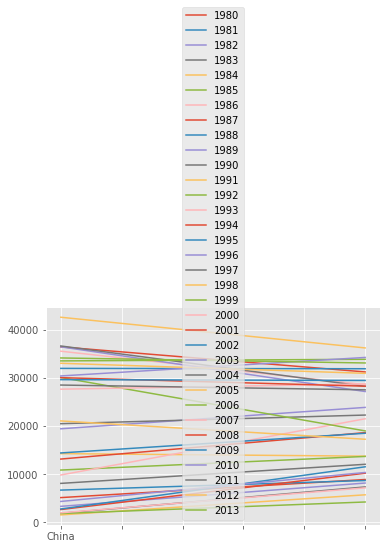

In [23]:
dfCI.plot()
plt.show()

In [38]:
dfCw = dfCI.transpose()
dfCw.head(2)

,China,India
1980,5123.0,8880.0
1981,6682.0,8670.0


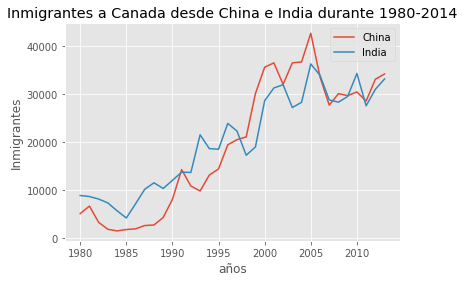

In [41]:
dfCw.plot()
plt.title("Inmigrantes a Canada desde China e India durante 1980-2014")
plt.xlabel("años")
plt.ylabel("Inmigrantes")
plt.show()

Text(0, 0.5, 'Inmigrantes')

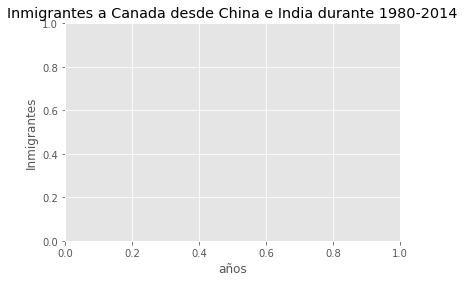